In [80]:
from google.colab import files
uploaded = files.upload()

In [0]:
# 載入套件
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

In [0]:
#讀取檔案
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

# 資料觀察

In [3]:
data_train.info()  
data_train.describe()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data_test.info()  
data_test.describe()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
data = data_train.append(data_test)
data.reset_index(inplace=True, drop=True)
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [6]:
data.info()  
data.describe()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


# 資料分析

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


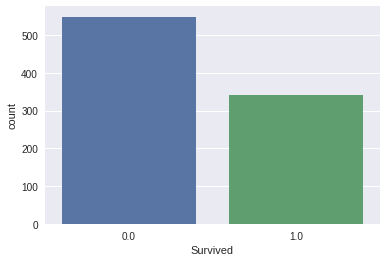

In [7]:
#觀察生存狀況
sns.countplot(data['Survived'])

## 觀察船艙等級與生存的關係

1號船艙存活率 :  0.6296
2號船艙存活率 :  0.4728
3號船艙存活率 :  0.2424


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


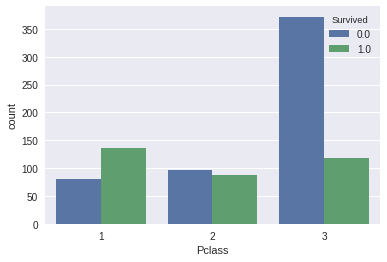

In [8]:
#畫圖
sns.countplot(data['Pclass'],hue=data['Survived'])
#計算比例
SurvivedRate_Pclass1 = data[data['Survived']==1][data['Pclass']==1]['Pclass'].count()/(data[data['Survived']==1][data['Pclass']==1]['Pclass'].count()+data[data['Survived']==0][data['Pclass']==1]['Pclass'].count())
SurvivedRate_Pclass2 = data[data['Survived']==1][data['Pclass']==2]['Pclass'].count()/(data[data['Survived']==1][data['Pclass']==2]['Pclass'].count()+data[data['Survived']==0][data['Pclass']==2]['Pclass'].count())
SurvivedRate_Pclass3 = data[data['Survived']==1][data['Pclass']==3]['Pclass'].count()/(data[data['Survived']==1][data['Pclass']==3]['Pclass'].count()+data[data['Survived']==0][data['Pclass']==3]['Pclass'].count())
print('1號船艙存活率 : ','%.4f' %SurvivedRate_Pclass1 )
print('2號船艙存活率 : ','%.4f' %SurvivedRate_Pclass2)
print('3號船艙存活率 : ','%.4f' %SurvivedRate_Pclass3)

## 觀察性別與生存的關係

男性存活率 :  0.1889
女性存活率 :  0.7420


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


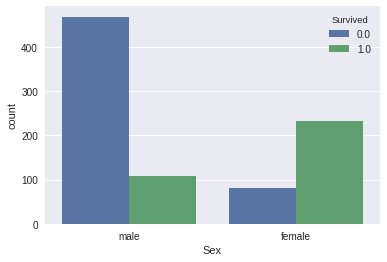

In [9]:
#畫圖
sns.countplot(data['Sex'],hue=data['Survived'])
#計算比例
SurvivedRate_SexM = data[data['Survived']==1][data['Sex']=='male']['Sex'].count()/(data[data['Survived']==1][data['Sex']=='male']['Sex'].count()+data[data['Survived']==0][data['Sex']=='male']['Sex'].count())
SurvivedRate_SexF = data[data['Survived']==1][data['Sex']=='female']['Sex'].count()/(data[data['Survived']==1][data['Sex']=='female']['Sex'].count()+data[data['Survived']==0][data['Sex']=='female']['Sex'].count())
print('男性存活率 : ','%.4f' %SurvivedRate_SexM )
print('女性存活率 : ','%.4f' %SurvivedRate_SexF)

## 出發港口與生存的關係

S港口存活率 :  0.3370
C港口存活率 :  0.5536
Q港口存活率 :  0.3896


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


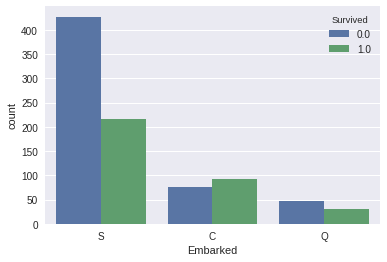

In [10]:
#畫圖
sns.countplot(data['Embarked'],hue=data['Survived'])
#計算比例
SurvivedRate_EmbarkedS = data[data['Survived']==1][data['Embarked']=='S']['Embarked'].count()/(data[data['Survived']==1][data['Embarked']=='S']['Embarked'].count()+data[data['Survived']==0][data['Embarked']=='S']['Embarked'].count())
SurvivedRate_EmbarkedC = data[data['Survived']==1][data['Embarked']=='C']['Embarked'].count()/(data[data['Survived']==1][data['Embarked']=='C']['Embarked'].count()+data[data['Survived']==0][data['Embarked']=='C']['Embarked'].count())
SurvivedRate_EmbarkedQ = data[data['Survived']==1][data['Embarked']=='Q']['Embarked'].count()/(data[data['Survived']==1][data['Embarked']=='Q']['Embarked'].count()+data[data['Survived']==0][data['Embarked']=='Q']['Embarked'].count())
print('S港口存活率 : ','%.4f' %SurvivedRate_EmbarkedS )
print('C港口存活率 : ','%.4f' %SurvivedRate_EmbarkedC)
print('Q港口存活率 : ','%.4f' %SurvivedRate_EmbarkedQ)

## 年齡與生存率的關係

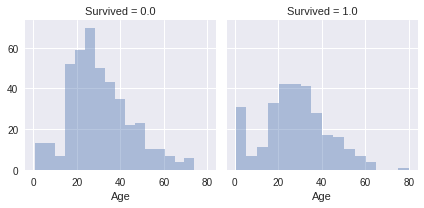

In [11]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age',kde=False)

## 票價與生存率的關係

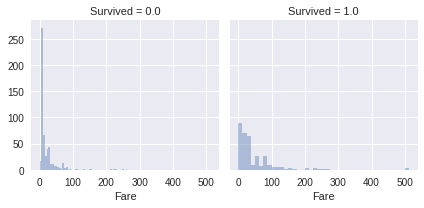

In [12]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare',kde=False)

## 父母孩子數量與生存率的關係


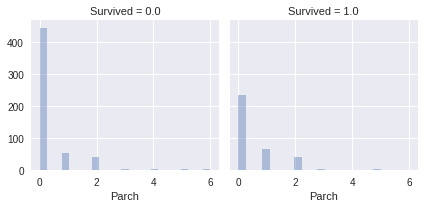

In [13]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch',kde=False)

## 兄弟姊妹&丈夫妻子數量與生存率的關係

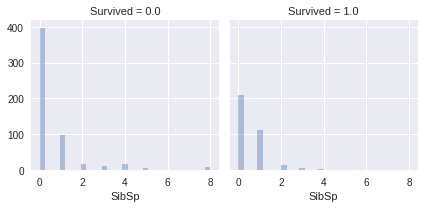

In [14]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp',kde=False)

## 把兄弟姊妹丈夫妻子 + 父母小孩 = 家人數量，並分析之

In [0]:
data['Family_Size'] = data['Parch'] + data['SibSp']

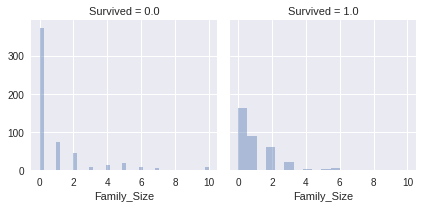

In [16]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size',kde=False)

# 特徵工程

## 補Embarked缺失值 (只有兩個缺失值，無腦補最多的S)

In [0]:
data['Embarked'] = data['Embarked'].fillna('S')

## 補Fare缺失值 (只有一筆，直接用平均)

In [0]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

## 補Age缺失值


擷取名字當中的稱謂，e.g. Miss, Mrs,......

In [0]:
data['title1'] = data['Name'].str.split(', ', expand=True)[1]

In [0]:
data['title1'] = data['title1'].str.split('. ', expand=True)[0]

In [21]:
data['title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer',
       'Dona'], dtype=object)

In [22]:
pd.crosstab(data['title1'],data['Sex']).T #查詢稱謂與性別的關係

title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


只留下稱謂多數的，少數稱謂併入多數內

In [0]:
data['title2'] = data['title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','th','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [24]:
pd.crosstab(data['title2'],data['Sex']).T #查詢稱謂與性別的關係

title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


將類別資料轉為整數

In [0]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['title1'] = data['title1'].astype('category').cat.codes
data['title2'] = data['title2'].astype('category').cat.codes

使用隨機森林預測Age

In [0]:
# 載入套件
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

In [0]:
#分出缺值跟非缺值
dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]

In [0]:
#移除outlier (使用4倍標準差)
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
                                (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))]  

In [29]:
#隨機森林建模
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'title1', 'title2']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])

In [31]:
dataAgeNull['Age'] = ageNullValues

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
data = dataAgeNull.append(dataAgeNotNull)
data = data.sort_values('PassengerId')
data.reset_index(inplace=True, drop=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null int8
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int8
Sex            1309 non-null int8
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
title1         1309 non-null int8
title2         1309 non-null int8
dtypes: float64(3), int64(4), int8(5), object(3)
memory usage: 108.7+ KB


# Modeling

In [0]:
y_train = data[data['Survived'].notna()]['Survived'].values
x_train = data[data['Survived'].notna()].drop(['Survived','Cabin','Name','PassengerId','Ticket','title1'],axis=1).values
x_test = data[data['Survived'].isna()].drop(['Survived','Cabin','Name','PassengerId','Ticket','title1'],axis=1).values

In [0]:
# 將 training data 分出一部分作為驗證資料
x_train_validation,x_test_validation,y_train_validation,y_test_validation = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

## Building model by Neural Network 

In [51]:
# 載入套件
%env KERAS_BACKEND=tensorflow
import keras 
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

env: KERAS_BACKEND=tensorflow


In [0]:
# Initialising the NN
model = Sequential()

In [0]:
# layers
model.add(Dense(9,input_dim=9))
model.add(Activation("relu"))
model.add(Dense(9))
model.add(Activation("relu"))
model.add(Dense(5))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [0]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
# Train the ANN
model.fit(x_train_validation, y_train_validation, batch_size = 32, epochs = 200)

Epoch 1/200
712/712 [==============================] - 0s 628us/step - loss: 2.4437 - acc: 0.3919
Epoch 2/200
712/712 [==============================] - 0s 168us/step - loss: 1.0499 - acc: 0.5421
Epoch 3/200
712/712 [==============================] - 0s 153us/step - loss: 0.8539 - acc: 0.5702
Epoch 4/200
712/712 [==============================] - 0s 157us/step - loss: 0.7516 - acc: 0.6152
Epoch 5/200
712/712 [==============================] - 0s 151us/step - loss: 0.7146 - acc: 0.6250
Epoch 6/200
712/712 [==============================] - 0s 151us/step - loss: 0.6910 - acc: 0.6503
Epoch 7/200
712/712 [==============================] - 0s 144us/step - loss: 0.6822 - acc: 0.6404
Epoch 8/200
712/712 [==============================] - 0s 159us/step - loss: 0.6637 - acc: 0.6419
Epoch 9/200
712/712 [==============================] - 0s 151us/step - loss: 0.6468 - acc: 0.6629
Epoch 10/200
712/712 [==============================] - 0s 168us/step - loss: 0.6375 - acc: 0.6559
Epoch 11/200
712/71

## 確認驗證資料集的準確性

In [56]:
score=model.evaluate(x_test_validation,y_test_validation)
print('lose : ','%.4f' %score[0])
print('accuracy : ','%.4f' %score[1])

179/179 [==============================] - 0s 518us/step
lose :  0.4453
accuracy :  0.7877


## 預測test data，並產出結果交給Kaggle

In [0]:
y_pred = model.predict(x_test)
y_final = (y_pred > 0.5).astype(int).reshape(x_test.shape[0])

In [0]:
output = pd.DataFrame({'PassengerId': data[data['Survived'].isna()]['PassengerId'], 'Survived': y_final})
output.reset_index(inplace=True, drop=True)

In [0]:
output.to_csv('Kaggle Titanic prediction.csv', index=False)

In [0]:
files.download('Kaggle Titanic prediction.csv')